Campaign analytics is the data pertaining to the results of marketing campaigns. Marketing may be running promotional campaigns via email or even through social media. In order to measure the ROI of these marketing efforts, it is necessary to analyze and test various parameters. Different campaigns created by businesses

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("E:\Data science\Python\Assignments\classification\Customer_Campaign.csv",header='infer')

In [3]:
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [4]:
data.shape

(45211, 17)

Data has 17 attributes ,in which 16 are predictor variables and 1 is outcome variable

Data is about the customer details,based on the given parameters we will build a model,whether the customer will subscibe for a term deposit or not

# Data analysis - Univariate, bivariate and Multivariate

# pandas profiling

In [5]:
import pandas_profiling

In [6]:
profile = pandas_profiling.ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
x = data.iloc[:,:-1]


In [8]:
y = data.iloc[:,-1]
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [9]:
names = x.columns
names

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [10]:
data.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [11]:
data.mean()

age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64

In [12]:
data.median()

age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

In [13]:
data.mode()

age          job  marital  education default  balance housing loan  \
0   32  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   20   may       124         1     -1         0  unknown  no

In [14]:
data.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [15]:
data.kurtosis()

age            0.319570
balance      140.751547
day           -1.059897
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64

In [16]:
qnt = data.quantile(q = [0,0.25,0.50,0.75,1])
qnt

age   balance   day  duration  campaign  pdays  previous
0.00  18.0   -8019.0   1.0       0.0       1.0   -1.0       0.0
0.25  33.0      72.0   8.0     103.0       1.0   -1.0       0.0
0.50  39.0     448.0  16.0     180.0       2.0   -1.0       0.0
0.75  48.0    1428.0  21.0     319.0       3.0   -1.0       0.0
1.00  95.0  102127.0  31.0    4918.0      63.0  871.0     275.0

In [17]:
iqr = qnt.iloc[3,:]-qnt.iloc[1,:]
iqr

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64

In [18]:
upper = qnt.iloc[3,:]+1.5*iqr
lower = qnt.iloc[1,:]-1.5*iqr

In [19]:
print(upper)
print(lower)

age           70.5
balance     3462.0
day           40.5
duration     643.0
campaign       6.0
pdays         -1.0
previous       0.0
dtype: float64
age           10.5
balance    -1962.0
day          -11.5
duration    -221.0
campaign      -2.0
pdays         -1.0
previous       0.0
dtype: float64


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

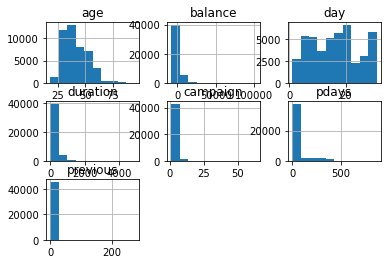

In [20]:
data.hist()

# Dealing with missing values

In [21]:
x.isna().sum()  # the data has no missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# Dealing with outliers

<AxesSubplot:>

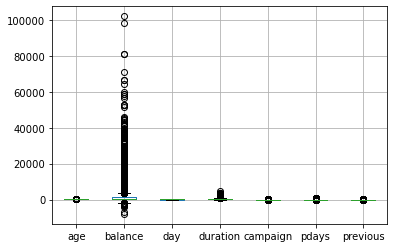

In [22]:
x.boxplot() # age ,balance and duration has outliers

C:\Users\sys\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

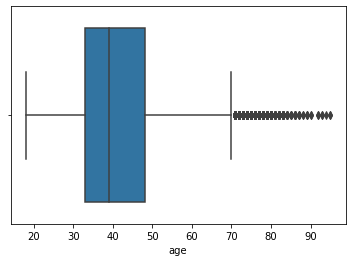

In [23]:
sns.boxplot(x['age'])

In [24]:
x['age'] = np.where(x['age']>70,x['age'].mean(),x['age'])

C:\Users\sys\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

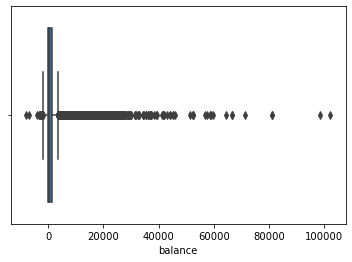

In [25]:
sns.boxplot(x['balance'])

In [26]:
x['balance'] = np.where(x['balance']>3460,x['balance'].mean(),x['balance'])
x['balance'] = np.where(x['balance']>-1962,x['balance'].mean(),x['balance'])


In [27]:
x['balance'] = np.where(x['balance']>-1200,x['balance'].mean(),x['balance'])

C:\Users\sys\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

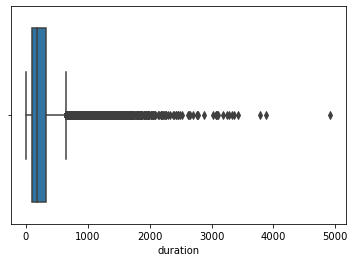

In [28]:
sns.boxplot(x['duration'])

In [29]:
x['duration'] =  np.where(x['duration']>450,x['duration'].mean(),x['duration'])

# Dealing with categorical data

In [30]:
x.head()

age           job  marital  education default     balance housing loan  \
0  58.0    management  married   tertiary      no  712.791642     yes   no   
1  44.0    technician   single  secondary      no  712.791642     yes   no   
2  33.0  entrepreneur  married  secondary      no  712.791642     yes  yes   
3  47.0   blue-collar  married    unknown      no  712.791642     yes   no   
4  33.0       unknown   single    unknown      no  712.791642      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  
0  unknown    5   may     261.0         1     -1         0  unknown  
1  unknown    5   may     151.0         1     -1         0  unknown  
2  unknown    5   may      76.0         1     -1         0  unknown  
3  unknown    5   may      92.0         1     -1         0  unknown  
4  unknown    5   may     198.0         1     -1         0  unknown

In [31]:
x = pd.get_dummies(data=x,columns=['job','education','housing','month'])

In [32]:
x['marital'] =pd.get_dummies(x['marital'])

In [33]:
x['default'] = pd.get_dummies(x['default'])
x['loan'] =  pd.get_dummies(x['loan'])
x['contact'] = pd.get_dummies(x['contact'])


In [34]:
x['poutcome'] = pd.get_dummies(x['poutcome'])

In [35]:
names = x.columns

In [36]:
x.corr() 

age   marital   default   balance      loan  \
age                  1.000000  0.161844  0.014357 -0.008149  0.000300   
marital              0.161844  1.000000 -0.017777 -0.007203 -0.016377   
default              0.014357 -0.017777  1.000000  0.078011  0.077234   
balance             -0.008149 -0.007203  0.078011  1.000000  0.027642   
loan                 0.000300 -0.016377  0.077234  0.027642  1.000000   
contact             -0.063229 -0.006786  0.010061 -0.002287 -0.013604   
day                 -0.007032 -0.000433 -0.009424 -0.001804 -0.011370   
duration            -0.032929 -0.001578  0.005609 -0.006671  0.013965   
campaign             0.012757 -0.015484 -0.016822  0.000766 -0.009980   
pdays               -0.032346  0.002897  0.029979  0.007310  0.022754   
previous            -0.009310 -0.004534  0.018329  0.004476  0.011043   
poutcome            -0.007975 -0.001884  0.026389  0.006195  0.002186   
job_admin.          -0.046294  0.033624  0.010037  0.006385 -0.030781   
job_blue-collar     -0.027223 -0.062518 -0.010341 -0.000503 -0.018291   
job_entrepreneur     0.029584  0.003007 -0.026281 -0.005051 -0.039808   
job_housemaid        0.091064  0.017473  0.000359  0.002983  0.017234   
job_management      -0.007650  0.003699  0.002655 -0.011525  0.038904   
job_retired          0.327966  0.052180  0.011290  0.004079  0.014861   
job_self-employed   -0.003635 -0.015796 -0.004107 -0.008145  0.007882   
job_services        -0.057995  0.016930 -0.000068  0.002988 -0.035575   
job_student         -0.205437 -0.049597  0.016222  0.002586  0.058503   
job_technician      -0.056470  0.009274  0.003089  0.005415 -0.014798   
job_unemployed       0.007150  0.008669 -0.006470  0.003061  0.035961   
job_unknown          0.049955 -0.014082  0.006669  0.001423  0.031943   
education_primary    0.176821 -0.007157 -0.001623  0.002852  0.012396   
education_secondary -0.081414  0.019795 -0.013220  0.009006 -0.070625   
education_tertiary  -0.076605 -0.009259  0.015239 -0.013724  0.045940   
education_unknown    0.061460 -0.015666  0.001236  0.003677  0.049992   
housing_no           0.156730 -0.001778 -0.006025  0.002530  0.041323   
housing_yes         -0.156730  0.001778  0.006025 -0.002530 -0.041323   
month_apr           -0.039890 -0.019043  0.028254 -0.003251  0.027371   
month_aug            0.078453 -0.027603  0.007521  0.004996  0.069359   
month_dec            0.003250 -0.002672  0.009344  0.001225  0.020459   
month_feb           -0.011654 -0.001206  0.009027  0.004432  0.008842   
month_jan           -0.009876  0.002164  0.006990  0.003179  0.004450   
month_jul            0.012476  0.016169 -0.044257 -0.015942 -0.167764   
month_jun            0.065327  0.011779 -0.007582  0.004249  0.022749   
month_mar           -0.001861 -0.004704  0.013991  0.001835  0.029761   
month_may           -0.114087  0.008365  0.002946  0.002531  0.027867   
month_nov            0.038228  0.009247 -0.006129 -0.000386 -0.019154   
month_oct            0.028092 -0.003279  0.017454  0.002289  0.030097   
month_sep           -0.002497 -0.007816  0.013953  0.002024  0.033663   

                      contact       day  duration  campaign     pdays  ...  \
age                 -0.063229 -0.007032 -0.032929  0.012757 -0.032346  ...   
marital             -0.006786 -0.000433 -0.001578 -0.015484  0.002897  ...   
default              0.010061 -0.009424  0.005609 -0.016822  0.029979  ...   
balance             -0.002287 -0.001804 -0.006671  0.000766  0.007310  ...   
loan                -0.013604 -0.011370  0.013965 -0.009980  0.022754  ...   
contact              1.000000  0.020186  0.040337 -0.032271  0.225996  ...   
day                  0.020186  1.000000 -0.060747  0.162490 -0.093044  ...   
duration             0.040337 -0.060747  1.000000 -0.168740  0.024744  ...   
campaign            -0.032271  0.162490 -0.168740  1.000000 -0.088628  ...   
pdays                0.225996 -0.093044  0.024744 -0.088628  1.000000  ...   
previous             0.13171

In [37]:
x.dtypes

age                    float64
marital                  uint8
default                  uint8
balance                float64
loan                     uint8
contact                  uint8
day                      int64
duration               float64
campaign                 int64
pdays                    int64
previous                 int64
poutcome                 uint8
job_admin.               uint8
job_blue-collar          uint8
job_entrepreneur         uint8
job_housemaid            uint8
job_management           uint8
job_retired              uint8
job_self-employed        uint8
job_services             uint8
job_student              uint8
job_technician           uint8
job_unemployed           uint8
job_unknown              uint8
education_primary        uint8
education_secondary      uint8
education_tertiary       uint8
education_unknown        uint8
housing_no               uint8
housing_yes              uint8
month_apr                uint8
month_aug                uint8
month_de

# Feature Selection using randomforest

In [38]:
#Feature selection using Random forest
from sklearn import ensemble

In [39]:
fea_imp = ensemble.RandomForestClassifier()

In [40]:
fea_imp.fit(x,y)

RandomForestClassifier()

In [41]:
f = fea_imp.feature_importances_ 
f

array([1.47213431e-01, 1.43642310e-02, 3.03960997e-03, 9.45103348e-05,
       1.36679266e-02, 1.75797298e-02, 1.31181295e-01, 2.24803148e-01,
       6.16621457e-02, 6.06132869e-02, 3.19371504e-02, 1.59331126e-02,
       1.10315605e-02, 1.01672018e-02, 4.71354930e-03, 4.03840324e-03,
       1.18068874e-02, 7.80462798e-03, 5.62961625e-03, 7.93212271e-03,
       5.81460599e-03, 1.27789131e-02, 5.60141859e-03, 1.53320209e-03,
       8.42872558e-03, 1.33511204e-02, 1.21373051e-02, 6.18119972e-03,
       1.36064050e-02, 1.48645639e-02, 1.42104896e-02, 1.01579726e-02,
       4.53897239e-03, 9.48669504e-03, 5.99865421e-03, 9.36679251e-03,
       1.13823454e-02, 1.41529854e-02, 1.01950834e-02, 9.23041129e-03,
       1.18725437e-02, 9.89604764e-03])

In [42]:
x.head()

age  marital  default     balance  loan  contact  day  duration  campaign  \
0  58.0        0        1  712.791642     1        0    5     261.0         1   
1  44.0        0        1  712.791642     1        0    5     151.0         1   
2  33.0        0        1  712.791642     0        0    5      76.0         1   
3  47.0        0        1  712.791642     1        0    5      92.0         1   
4  33.0        0        1  712.791642     1        0    5     198.0         1   

   pdays  ...  month_dec  month_feb  month_jan  month_jul  month_jun  \
0     -1  ...          0          0          0          0          0   
1     -1  ...          0          0          0          0          0   
2     -1  ...          0          0          0          0          0   
3     -1  ...          0          0          0          0          0   
4     -1  ...          0          0          0          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  
0          0          1          0          0          0  
1          0          1          0          0          0  
2          0          1          0          0          0  
3          0          1          0          0          0  
4          0          1          0          0          0  

[5 rows x 42 columns]

In [45]:
x_x = x[['age','day','duration','campaign','pdays','previous']]


In [46]:
xnames = x_x.columns

In [47]:
x_x.shape

(45211, 6)

In [48]:
y.shape

(45211,)

# splitting and scaling of selected features

In [49]:
from sklearn import preprocessing

In [50]:
x_x = preprocessing.minmax_scale(x_x,feature_range=(0,1))

In [51]:
x_x = pd.DataFrame(x_x,columns=xnames)

In [52]:
from sklearn import model_selection

In [53]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_x,y,test_size=0.2,random_state=0)

# Classification Model Building

In [54]:
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors

In [56]:
pip install xgboost


  Using cached xgboost-1.4.2-py3-none-win_amd64.whl (97.8 MB)


In [57]:
import xgboost

In [58]:
# Applying all the classification models
Log = linear_model.LogisticRegression()
svm = svm.SVC()
Dtree = tree.DecisionTreeClassifier()
RF = ensemble.RandomForestClassifier()
Gradient = ensemble.GradientBoostingClassifier()
XGB = xgboost.XGBClassifier()

In [59]:
Log.fit(x_train,y_train)
svm.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
RF.fit(x_train,y_train)
Gradient.fit(x_train,y_train)
XGB.fit(x_train,y_train)

C:\Users\sys\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
# predicting the models
LogP = Log.predict(x_test)
svmP = svm.predict(x_test)
DtreeP = Dtree.predict(x_test)
RFP = RF.predict(x_test)
GradientP = Gradient.predict(x_test)
XGBP = XGB.predict(x_test)

# Accuracy of the each models


In [61]:
from sklearn import metrics

In [62]:
logreg = metrics.accuracy_score(LogP,y_test)
svm = metrics.accuracy_score(svmP,y_test)
Dtree = metrics.accuracy_score(DtreeP,y_test)
Rand = metrics.accuracy_score(RFP,y_test)
GB = metrics.accuracy_score(GradientP,y_test)
XG = metrics.accuracy_score(XGBP,y_test)

In [63]:
print("Log_classification:" , logreg*100)
print("Support vector:" ,svm*100)
print("Decision tree:" ,Dtree*100)
print("RandomForest:",Rand*100)
print("Gradient Boosting:",GB*100)
print("XGBoost:",XG*100)

Log_classification: 88.16764348114565
Support vector: 88.27822625234988
Decision tree: 84.9165100077408
RandomForest: 88.30034280659073
Gradient Boosting: 89.17394669910428
XGBoost: 89.1850049762247


Out of all MOdels Gradient Boosting and XGBoost has the highest accuracy 

# Parameter and Hyper-parameter tuning for XGB and Gradient Boosting to imporve the performance

In [64]:
Gradient = ensemble.GradientBoostingClassifier( learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse')
XGB = xgboost.XGBClassifier( learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse')

In [65]:
Gradient.fit(x_train,y_train)
XGB.fit(x_train,y_train)

C:\Users\sys\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:55:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:55:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='friedman_mse',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [66]:
t1 =Gradient.predict(x_train)
t2 =XGB.predict(x_train)

In [67]:
print(metrics.accuracy_score(t1,y_train))
print(metrics.accuracy_score(t2,y_train))      #train accuracy scores

0.8945200176952002
0.9054136253041363


In [68]:
p = Gradient.predict(x_test)
p1 = XGB.predict(x_test)          # test accuracy scores

In [69]:
print(metrics.accuracy_score(p,y_test))
print(metrics.accuracy_score(p1,y_test))


0.8917394669910428
0.8922923808470641


By considering select columns
